# ARIMA(AotuRegressive Integrated Moving Averege)

* It is forecasting technique that project the future values of a series based entirely on its own inertia.
* Its main application is in the area of short term forecasting requiring at least 40 historical data points.
* It works best when your data exhibits a stable or consistent pattern over time with a minimum amourt of outlier
* Since the 1970, ARIMA models have been extensively used in many fields,including,economics,business, engineering and natural science. They have also been extended in various ways, such as SARIMA(Seasonal ARIMA) for dealing with seasonal data,and ARIMAX(ARIMA with eXogenous input) for incorporating other predictor variables.
  ## ASUMPTION OF ARIMA:
  1. `Stationarity :`The most important assumption made by ARIMA models is that the data are stationarity. A stationarity time series is one whose properties do not depend on the time at which the series is observed. In other words, it assume that the mean,varience, and autocorrelation structure do not change over time. If the original data are not stationary they need to be transformed so that they are. This often done by differencing the data logarithm transformation or defination by a control series
   2. `Linearity : ` The Arima model assume that the data can be fitted to a linear model. This is why its important to check the residuals of yours ARIMA models to ensure that they are random and normall distributed around the zero. If they show any pattern or are not normally distributed this could be an indication that your data are not linear and the ARIMA model may not the best choice
   3. `No sudden jumps or breaks : ` ARIMA models assume that the underlying time series does not have sudden jumps or breaks. If your data has sudden jumps or breaks, you may need to consider a different type of model
   4. `No missing value :` The ARIMA model assume that there are no missing values in the time series. If your data do have missing values. you will not need to either fill them or interpolate them in some way before you can fit an ARIMA model
   5. `Invertiability :` For the moving average(MA) part of the model, The ARIMA model assume that the error terms (the noise) are generated by a linear combination of white noise error terms. This assumption is refered to invertiability. A process is said to invertiable if the current value of the series can be expressed as a linear combination of the past white noises
   ### BASIC RUN Down of what ARIMA is 
   1. `AR : AUTORession` A model that uses the dependent relationship between an observaton and some number of lagged observation (previous periods)
   2. `I: Integrated : ` The use of differencing of raw observation (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
   3. `MA:Moving Average` A model that uses the dependency between an observation and a residual error from moving average model applied to lagged observation 
   ####  ARIMA models are generally denoted ARIMA(p,d,q) where parameters p,d,q are non-nagetive integers
   * `p` is the order (number of time lags) of the outoregressive model,
   * `d` is the degree of differencing (the number of times the data have had past values subtracted), and
   * q is the order of the moving average model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# set the random seed for the productability
np.random.seed(0)

# create a time series of 200 points
n= 200
t=np.arange(n)
# create a simple trend of 0.1 *t+random noise
data = 0.1 * t + np.random.randn(n)

# convert to pandas series for convenience
s = pd.Series(data)


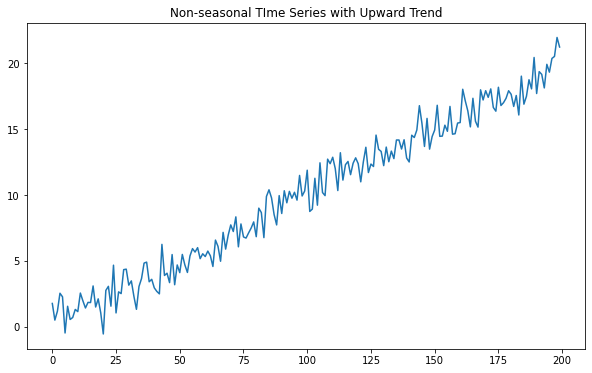

In [4]:
plt.figure(figsize=(10,6))
plt.plot(s)
plt.title('Non-seasonal TIme Series with Upward Trend')
plt.show()

# Time Series Forecasting of Stock Market Data wit Arima In Python

In [8]:
# import libraries
import pandas as pd , numpy as np, matplotlib.pyplot as plt,seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [9]:
date.today()

datetime.date(2023, 9, 26)

In [12]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime('%Y-%m-%d')
end_date =d1
d2 = date.today()-timedelta(days=365)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2
print("my data will be between these dates:",start_date,end_date)

my data will be between these dates: 2022-09-26 2023-09-26


In [19]:
# difine the ticker
ticker = 'GOOGL'
df = yf.download(ticker,start=start_date,end=end_date,progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,98.099998,99.879997,97.800003,98.169998,98.169998,27072700
2022-09-27,99.430000,100.000000,96.870003,97.500000,97.500000,30072800
2022-09-28,97.650002,100.699997,97.110001,100.050003,100.050003,32466300
2022-09-29,98.639999,98.639999,95.959999,97.419998,97.419998,31047200
2022-09-30,97.050003,98.900002,95.559998,95.650002,95.650002,32941500


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-26 to 2023-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


there are six column and 251 entries in the dataset. This the yearly data of 365 days but there are holidays involve when the stock was not run , other thing is date column is index of the data i changed it in the column of the data


In [21]:
df.insert(0,'Date',df.index,True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-26 to 2023-09-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB


In [23]:
# reset the column of the date as index
#df['Date']=df.index
df.reset_index(drop=True,inplace=True)

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,98.099998,99.879997,97.800003,98.169998,98.169998,27072700
1,2022-09-27,99.430000,100.000000,96.870003,97.500000,97.500000,30072800
2,2022-09-28,97.650002,100.699997,97.110001,100.050003,100.050003,32466300
3,2022-09-29,98.639999,98.639999,95.959999,97.419998,97.419998,31047200
4,2022-09-30,97.050003,98.900002,95.559998,95.650002,95.650002,32941500


 Now for the analysis of the data i take the only one column 'close' based on the date

In [26]:
# select columns
df=df[['Date','Close']]
df.head()

,Date,Close
0,2022-09-26,98.169998
1,2022-09-27,97.500000
2,2022-09-28,100.050003
3,2022-09-29,97.419998
4,2022-09-30,95.650002


In [27]:
# plot the data to se how it looks like using the plotly
fig = px.line(df, x="Date", y="Close",title='Google stock Price')  # create a lineplot with "x" and "y"
fig.show()

# Lets Move toward the model and check the assumption of ARIMA model
1. first check the stationarity in the data

In [34]:
#  stationarity on the data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistics: %f'% result[0])
    print('p-value %f'% result[1])
    if result[1] < 0.05:
        print('Reject the null hypothesis, Data is stationarity')
    else:
            print('Data is not stationarity')

adf_test(df['Close'])

ADF Statistics: -0.632869
p-value 0.863381
Data is not stationarity


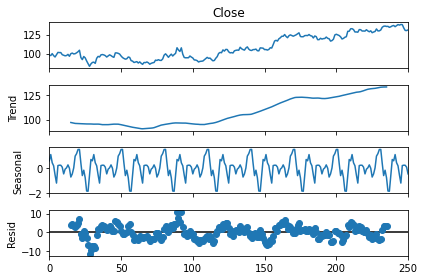

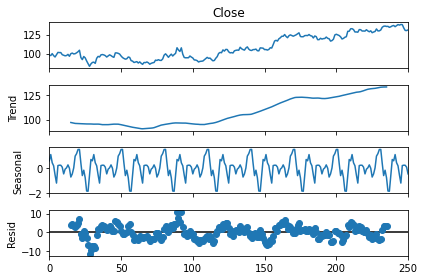

In [35]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'],model='additive',period=30)
decompose.plot()

Now checck the auto correlation of the data

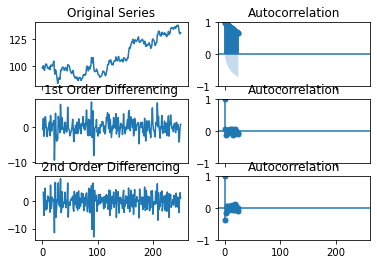

<Figure size 1080x432 with 0 Axes>

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Original Series

fig,axes = plt.subplots(3,2,sharex=True)
plt.figure(figsize=(15,6))

# Original Series
axes[0,0].plot(df['Close']); axes[0,0].set_title('Original Series')
plot_acf(df['Close'],ax=axes[0,1])


# 1st Differencing
axes[1,0].plot(df['Close'].diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(),ax=axes[1,1])

# 2nd Differencing
axes[2,0].plot(df['Close'].diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(),ax=axes[2,1])

plt.show()



The value of the 'd' is enough for me to remove the trend from the data `d=1`
#### lets find the value of p `autoregressive of the data`

           0
0   1.000000
1   0.984340
2   0.967437
3   0.953431
4   0.938122
5   0.921274
6   0.904970
7   0.890258
8   0.876678
9   0.862680
10  0.847495
11  0.830567
12  0.813905
13  0.798147
14  0.781779
15  0.765355
16  0.752029
17  0.740090
18  0.728140
19  0.715178
20  0.704888
21  0.696755
22  0.688916
23  0.679305


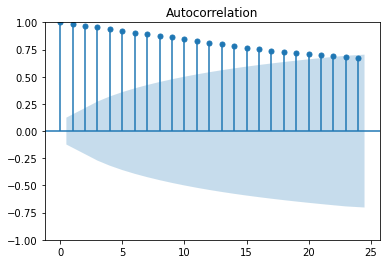

In [45]:
# plots the value
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#pd.plotting.autocorrelation_plot(df['Close'])

plot_acf(df['Close'],alpha=0.05)

from statsmodels.tsa.stattools import acf,pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

i take the value `p=2` becaues the confidence interval(95%) is low after the two value from the data
##### lets find the value of the q 

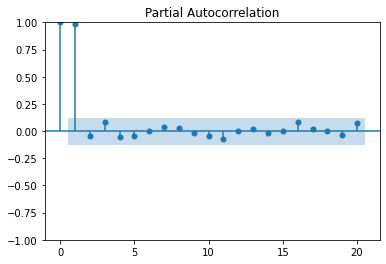

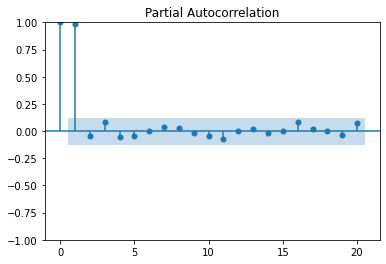

In [47]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf,pacf
plot_pacf(df['Close'],lags=20,alpha=0.05)

in the graph there are two points are far away from the remaining data points to sort out this we take value of `q=2` 

In [48]:
# lets define p,d,q
p=2
d=1
q=2


In [53]:
# lets run arima with pdmarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic


 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=35.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1233.448, Time=0.49 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1179.834, Time=1.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.64 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1235.064, Time=1.57 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1147.170, Time=7.87 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.82 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=15.25 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1145.360, Time=2.79 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1178.545, Time=1.23 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=10.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=8.50 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1147.103, Time=2.61 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1147.545, Time=5.18 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1147.360, Time=4.97 sec

Best model:  ARIMA(0

In [55]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -569.680
Date:                            Tue, 26 Sep 2023   AIC                           1145.360
Time:                                    04:55:53   BIC                           1155.777
Sample:                                         0   HQIC                          1149.559
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6492      0.051    -12.712      0.000      -0.749      -0.549
ar.S.L24      -0.3928      0.057   

In [57]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 2,1,2
model = ARIMA(df['Close'],order=[p,d,q])
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -552.807
Date:                Tue, 26 Sep 2023   AIC                           1115.613
Time:                        05:00:08   BIC                           1133.221
Sample:                             0   HQIC                          1122.700
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2882      0.429      0.672      0.502      -0.552       1.129
ar.L2          0.1601      0.345      0.463      0.643      -0.517       0.837
ma.L1         -0.2102      0.412     -0.510      0.6

# Forecast the next thirty days ahead the data

251    131.374989
252    131.456408
253    131.522282
254    131.554296
255    131.574064
256    131.584885
257    131.591167
258    131.594709
259    131.596735
260    131.597886
261    131.598542
262    131.598915
263    131.599127
264    131.599248
265    131.599317
266    131.599356
267    131.599379
268    131.599391
269    131.599399
270    131.599403
271    131.599405
272    131.599406
273    131.599407
274    131.599408
275    131.599408
276    131.599408
277    131.599408
278    131.599408
279    131.599408
280    131.599408
281    131.599408
Name: predicted_mean, dtype: float64


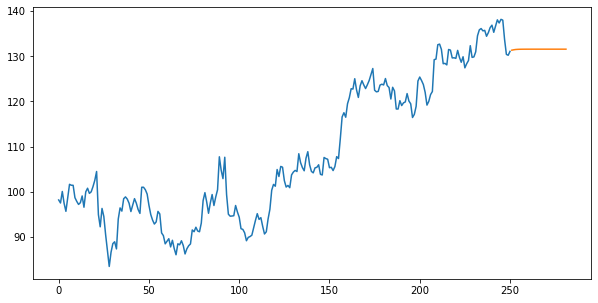

In [62]:
# predict next 30 days
forecast = model.predict(len(df['Close']),len(df['Close'])+30)
# print(forecast)
# plot the forecast
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='Actual')
plt.plot(forecast,label='Forecast')
plt.show()

This did not give accurate result because i try arima model on a seasonal data so the seasonal data use mostly sarima model

In [65]:
# lets run the sarima model
import statsmodels.api as sm
import warnings

p,d,q = 2,1,2
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -542.094
Date:                            Tue, 26 Sep 2023   AIC                           1102.188
Time:                                    05:21:13   BIC                           1133.439
Sample:                                         0   HQIC                          1114.783
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4628      0.360      1.284      0.199      -0.244       1.169
ar.L2          0.3023      0.341   

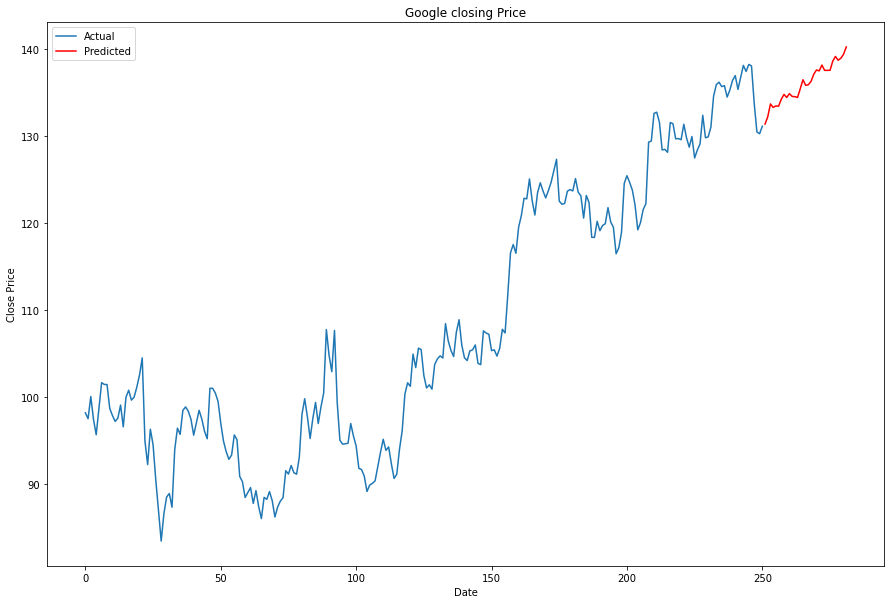

In [68]:
prediction = model.predict(start=len(df['Close']),end=len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15,10))
plt.plot(df['Close'],label='Actual')
plt.plot(prediction,color='red',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing Price')

# Changed the legend location
plt.legend(loc='upper left')
plt.show()

In [51]:
%pip install pmdarima


     -------------------------------------- 569.7/569.7 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/db/3e/8cf60af86446b129e79adee5d9131ec7eb043297e20c04bc31670331325c/Cython-3.0.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 2.8/2.8 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
